## import the necessaryLiberaries

In [1353]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

## Imprting Data

In [1354]:
dataset = pd.read_excel("/content/WAR data set.xlsx")

In [1355]:
dataset

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,35,9.5,0.147273,3,33.944,20.0,15.0
1,25,8.2,0.050909,3,25.458,20.0,8.0
2,30,9.5,0.550000,3,33.944,20.0,22.0
3,30,9.5,0.550000,7,33.944,20.0,27.3
4,30,9.5,0.550000,10,33.944,20.0,28.6
...,...,...,...,...,...,...,...
116,25,8.0,1.100000,1,38.000,55.0,60.1
117,25,8.0,1.500000,1,38.000,55.0,58.2
118,25,8.0,0.500000,1,38.000,60.0,46.2
119,25,8.0,1.000000,1,38.000,60.0,48.3


In [1356]:
dataset.shape

(121, 7)

## EDA- Exploratory data analysis

In [1357]:
X = dataset.drop('Water Absorption reduction (%)', axis = 1)
y = dataset['Water Absorption reduction (%)']

# Spliting the data for training and testing

In [1358]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (96, 6)
Testing set size: (13, 6)
Validation set size: (12, 6)


In [1359]:
# Add noise injection to the training data
# This function takes a DataFrame, a noise factor, and the number of samples to generate
# It adds random noise to randomly selected existing data points to create new augmented samples
def add_noise(data, noise_factor=0.05, num_samples=84, random_state=42):
    augmented_data = []
    np.random.seed(random_state)
    for _ in range(num_samples): # Loop for the desired number of new samples
        # Select a random existing data point
        random_index = np.random.randint(0, len(data))
        sample = data.iloc[random_index]

        # Generate random noise with the same shape as a single data point
        noise = np.random.randn(data.shape[1]) * noise_factor

        # Add noise to the selected sample
        augmented_sample = sample + noise

        # Append the augmented sample to the list
        augmented_data.append(augmented_sample)

    # Convert the list of augmented samples back to a DataFrame
    augmented_data = pd.DataFrame(augmented_data, columns=data.columns)
    return augmented_data

# Generate augmented training data using noise injection
X_train_augmented = add_noise(X_train, num_samples=84)

# Randomly sample corresponding target values (y) for the augmented data
# We sample with replacement from the original y_train to match the number of augmented samples
y_train_augmented = y_train.iloc[np.random.choice(len(y_train), 84, replace=False)]

# Combine the original and augmented training data for features
X_train_combined = pd.concat([X_train, X_train_augmented], ignore_index=True)
y_train_combined = pd.concat([y_train, y_train_augmented], ignore_index=True)

# Print the sizes of the original, augmented, and combined training sets after noise injection
print(f"Original training set size (Noise Injection): {X_train.shape[0]}")
print(f"Augmented training set size (Noise Injection): {X_train_augmented.shape[0]}")
print(f"Combined training set size (Noise Injection): {X_train_combined.shape[0]}")

# Print the shapes of the combined training, test, and validation sets after noise injection
print("\nShapes after noise injection augmentation:")
print(f"Shape of X_train_combined: {X_train_combined.shape}")
print(f"Shape of y_train_combined: {y_train_combined.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Original training set size (Noise Injection): 96
Augmented training set size (Noise Injection): 84
Combined training set size (Noise Injection): 180

Shapes after noise injection augmentation:
Shape of X_train_combined: (180, 6)
Shape of y_train_combined: (180,)
Shape of X_test: (13, 6)
Shape of y_test: (13,)
Shape of X_val: (12, 6)
Shape of y_val: (12,)


In [1360]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1361]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-0.51209156, -1.0781941 , -0.05204704, -0.91387126,  2.31366223,
        -0.76841617],
       [-1.1948803 , -1.0781941 , -0.05204704, -0.21388476, -0.13632955,
        -0.03338277],
       [ 0.85348593, -0.16139487, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [ 0.85348593,  0.75540437, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [-0.51209156, -1.0781941 , -1.40661702, -0.91387126,  0.25104603,
        -0.03338277],
       [ 0.17069719,  0.75540437,  1.64116543,  0.48610173, -0.51315507,
        -0.76841617],
       [ 2.21906341,  1.67220361, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [-0.51209156, -0.61979448, -0.39068954, -0.91387126,  0.21839478,
        -0.76841617],
       [ 0.58037043, -1.0781941 , -1.40661702,  3.75270539, -2.71236056,
        -0.76841617],
       [ 0.17069719,  1.21380399,  0.1172742 ,  0.48610173, -0.48980561,
        -0.76841617],
       [-1.87766904,  0.75540437, -0.05204704,  0.

#Normalization of the data

In [1362]:
X_normal = (X - X.min()) / (X.max() - X.min())

In [1363]:
X_normal

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)
0,0.500,0.70,0.079777,0.10,0.442209,0.126984
1,0.250,0.44,0.014224,0.10,0.147403,0.126984
2,0.375,0.70,0.353741,0.10,0.442209,0.126984
3,0.375,0.70,0.353741,0.30,0.442209,0.126984
4,0.375,0.70,0.353741,0.45,0.442209,0.126984
...,...,...,...,...,...,...
116,0.250,0.40,0.727891,0.00,0.583116,0.682540
117,0.250,0.40,1.000000,0.00,0.583116,0.682540
118,0.250,0.40,0.319728,0.00,0.583116,0.761905
119,0.250,0.40,0.659864,0.00,0.583116,0.761905


## Linear Regression model

In [1364]:
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()

In [1365]:
LReg.fit(X_train ,y_train)

LinearRegression()

In [1366]:
LReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [1367]:
y_pred_train = LReg.predict(X_train_combined)
y_pred_test = LReg.predict(X_test)
y_pred_val= LReg.predict(X_val)

#Evaluation of the model

In [1368]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train_combined, LReg.predict(X_train_combined))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train_combined, LReg.predict(X_train_combined))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train_combined, LReg.predict(X_train_combined)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train_combined, LReg.predict(X_train_combined)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, LReg.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, LReg.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, LReg.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, LReg.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, LReg.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, LReg.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, LReg.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, LReg.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 242.6568
The MSE on the training dataset is: 58882.3254
The MAE on the training daset is: 214.7868
The r2_score on the training dataset is: -251.0530
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 11.7064
The MSE on the testing dataset is: 137.0394
The MAE on the testing dataset is: 9.2662
The r2_score on the testing dataset is: 0.1516
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 272.2537
The MSE on the validation dataset is: 74122.0581
The MAE on the validation dataset is: 234.8161
The r2_score on the validation dataset is: -240.7791


## Actual vs Predicted Capacity for test data

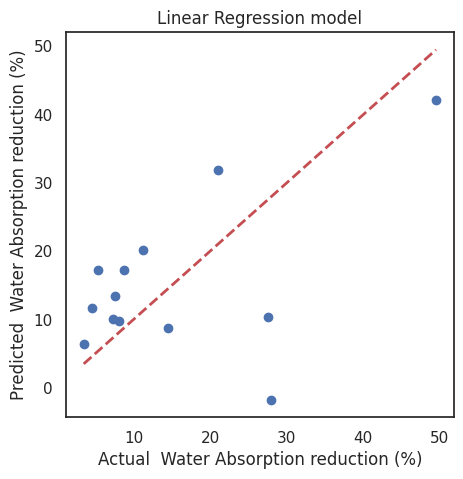

In [1369]:
sns.set_style("white")
plt.figure(figsize=(5,5))
plt.title('Linear Regression model')
plt.ylabel("Predicted  Water Absorption reduction (%)")
plt.xlabel("Actual  Water Absorption reduction (%)")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

## Actual vs Predicted Capacity for train data

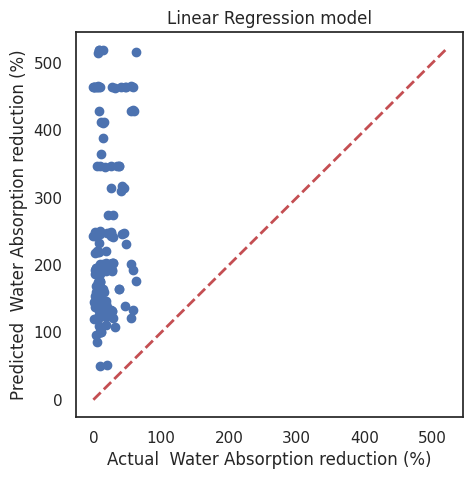

In [1370]:
plt.figure(figsize=(5,5))
plt.scatter(y_train_combined,y_pred_train )
plt.title('Linear Regression model')
plt.ylabel("Predicted  Water Absorption reduction (%)")
plt.xlabel("Actual  Water Absorption reduction (%)")
min_val = min(y_train_combined.min(), y_pred_train.min())
max_val = max(y_train_combined.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.show()

#check the model in the single row

In [1371]:
X1 = np.array(X)

In [1372]:
X1[0].reshape(1,6)

array([[35.        ,  9.5       ,  0.14727273,  3.        , 33.944     ,
        20.        ]])

In [1373]:
LReg.predict(scaler.transform(X1[0].reshape(1,6)))

array([7.04377053])

#### The above result indicates what the model is predict but the resul of water absorption reduction form the exiperment is 15%

#Getting Coefficients and Intercept

In [1374]:

coefficients = LReg.coef_
intercept = LReg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-2.43415197 -0.94079342  1.90077876 -3.40992809  2.2032078   7.2210267 ]
Intercept: 17.735535368217054
